<a href="https://colab.research.google.com/github/namigabbasov/Great-Powers/blob/main/Great_Powers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install miceforest
import miceforest as mf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import math
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.callbacks import EarlyStopping

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
df = pd.read_csv('Russia.csv')
#Create kernels. 
kernel = mf.ImputationKernel(
  data=df,
  save_all_iterations=True,
  random_state=3000
)

#Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

# Our new dataset
new_data = df
# Make a multiple imputed dataset with our new data
new_data_imputed = kernel.impute_new_data(new_data)
# Return a completed dataset
dataset = new_data_imputed.complete_data(0)

#dataset = df.dropna()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.shape[0]

2335

In [ ]:
dataset.shape[1]

10

In [ ]:
df.shape[0]

2335

In [ ]:
df.shape[1]

10

In [ ]:
X.shape[0]

2335

In [ ]:
X.shape[1]

9

In [ ]:
y.shape[0]

2335

In [ ]:
print(X)

[[ 1.  1. 33. ...  6.  2.  4.]
 [ 1.  1. 21. ...  5.  3.  1.]
 [ 1.  1. 26. ...  7.  1.  1.]
 ...
 [ 1.  2. 61. ...  5.  3.  1.]
 [ 1.  2. 74. ...  4.  3.  4.]
 [ 0.  2. 61. ...  4.  4.  4.]]


In [ ]:
print(y)

[1. 0. 0. ... 0. 0. 0.]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
X= sc.transform(X)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs =50)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


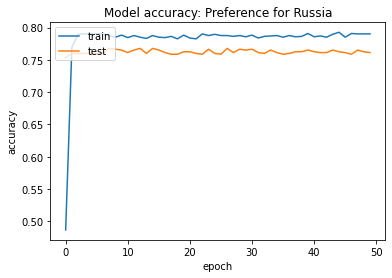

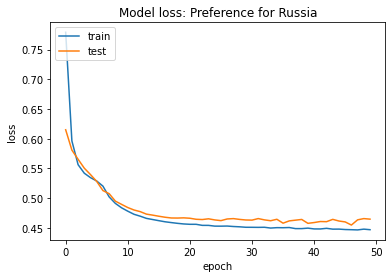

In [ ]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# create model
model = Sequential()
model.add(Dense(8, input_dim=9, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=50, batch_size=32, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy: Preference for Russia')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Preference for Russia')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[176  71]
 [ 87 133]]


0.6616702355460385